#  <div class="alert alert-success"> Big mart Sales Data Analysis and Prediction </div>

Project submitted by Muhammad Zaki Ahmad (As part of Data Science Internship TechnoColabs)


## Intital Hypothesis:
We want to predict the sale price of a particular item at a particular outlet of Big Mart.

* Popularity of the product( via advertisment and packing lucrativness) may increase the sale of the item.
* Type of the item 
* Visibility of the item ( More visible more chances of being bought)
* Ease of access to the item increases chances of being bought
* Weight of the item (people with no vehicles may prefer less weighted products, depends upon the demographic of the visiting customers
* Content and Quality of the product
* Quantity of the product
* Expensivness of the Product ( Depedns upon the visitng customer's dempgraphic)
* Location of the Outlet
* Ease of access to the outlet
* Type of the outlet
* Staff behaviour at the outlet



### <div class="alert alert-info"> Importing the Data and Intial Data Description </div>
    

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Train.csv")

In [20]:
df.shape

(8523, 12)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1696,FDK03,12.60,Regular,0.123728,Dairy,253.0356,OUT010,1998,NaN,Tier 3,Grocery Store,254.3356
1528,FDL40,17.70,Low Fat,0.011660,Frozen Foods,96.5410,OUT018,2009,Medium,Tier 3,Supermarket Type2,2220.4430
8141,NCY29,13.65,Low Fat,0.077549,Health and Hygiene,55.0930,OUT018,2009,Medium,Tier 3,Supermarket Type2,452.7440
4402,NCO53,16.20,Low Fat,0.176175,Health and Hygiene,184.0608,OUT017,2007,NaN,Tier 2,Supermarket Type1,2021.3688
5594,FDS32,17.75,Regular,0.029822,Fruits and Vegetables,139.9838,OUT017,2007,NaN,Tier 2,Supermarket Type1,1123.8704
7981,FDY34,NaN,Regular,0.010929,Snack Foods,167.0842,OUT027,1985,Medium,Tier 3,Supermarket Type3,6465.5838
3347,FDM44,NaN,LF,0.054364,Fruits and Vegetables,105.0990,OUT019,1985,Small,Tier 1,Grocery Store,103.1990
973,NCN43,12.15,Low Fat,0.011314,Others,122.9730,OUT010,1998,NaN,Tier 3,Grocery Store,123.1730
101,FDD10,NaN,Regular,0.045798,Snack Foods,178.5344,OUT027,1985,Medium,Tier 3,Supermarket Type3,2854.9504
653,DRF15,18.35,Low Fat,0.033349,Dairy,155.0340,OUT018,2009,Medium,Tier 3,Supermarket Type2,1990.7420


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.corr()["Item_Outlet_Sales"]

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

### <div class="alert alert-info"> Exploratoy Data Analysis </div>

### Univariate Analysis:

In [28]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

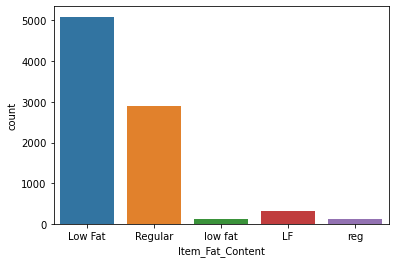

In [29]:
# Item Fat Content
sns.countplot(df["Item_Fat_Content"])

<AxesSubplot:>

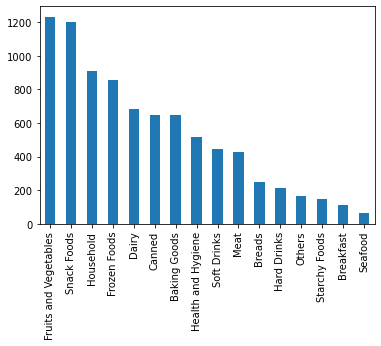

In [30]:
df["Item_Type"].value_counts().plot(kind = "bar")

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

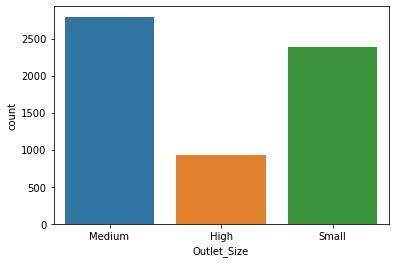

In [31]:
sns.countplot(df["Outlet_Size"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

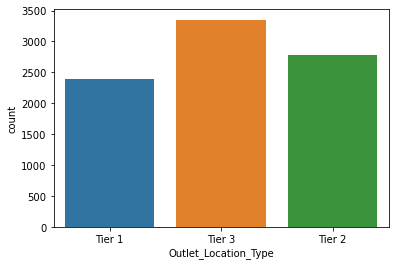

In [32]:
sns.countplot(df["Outlet_Location_Type"])

<AxesSubplot:>

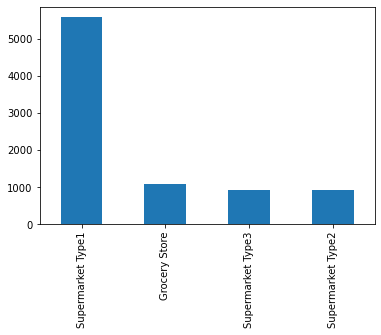

In [33]:
df["Outlet_Type"].value_counts().plot(kind = "bar")

In [34]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

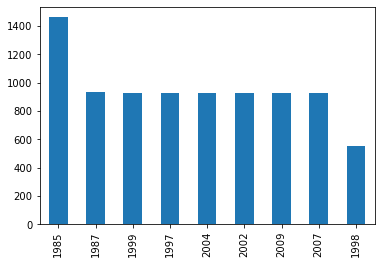

In [35]:
df["Outlet_Establishment_Year"].value_counts().plot(kind = "bar")

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

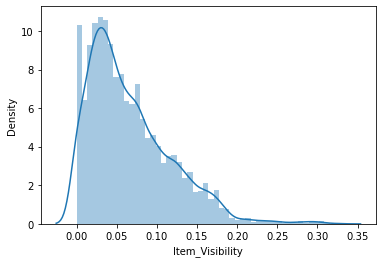

In [37]:
sns.distplot(df["Item_Visibility"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

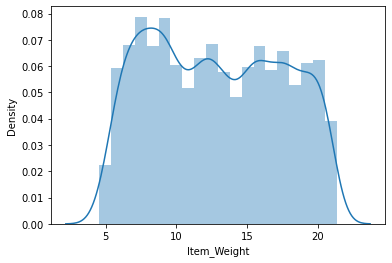

In [38]:
sns.distplot(df["Item_Weight"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

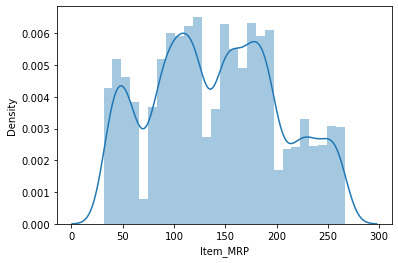

In [39]:
sns.distplot(df["Item_MRP"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

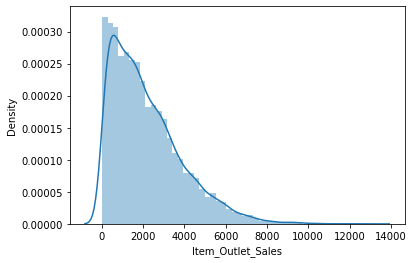

In [40]:
sns.distplot(df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

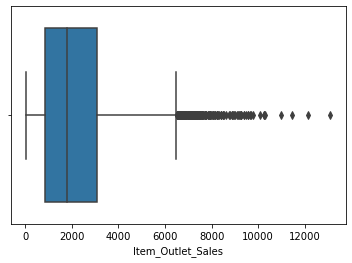

In [41]:
sns.boxplot(df['Item_Outlet_Sales'])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

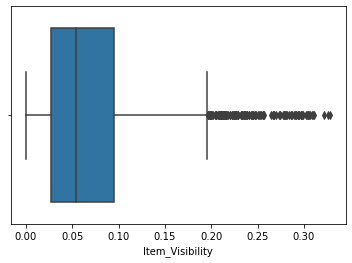

In [42]:
sns.boxplot(df['Item_Visibility'])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

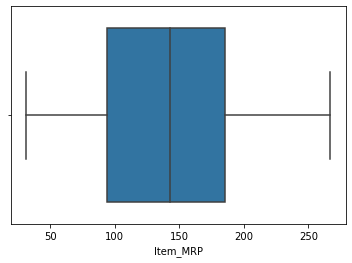

In [43]:
sns.boxplot(df['Item_MRP'])

In [44]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Bivariate Analysis

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

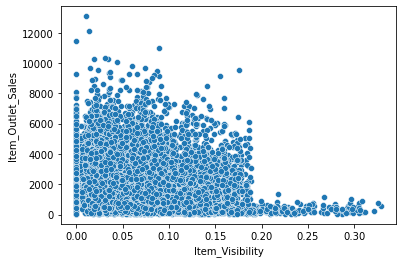

In [46]:
sns.scatterplot(df["Item_Visibility"], df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

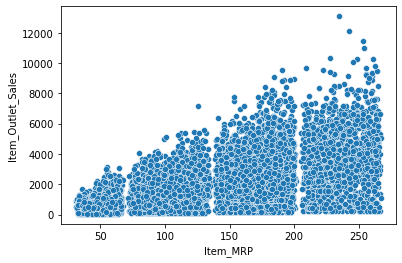

In [47]:
sns.scatterplot(df['Item_MRP'], df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

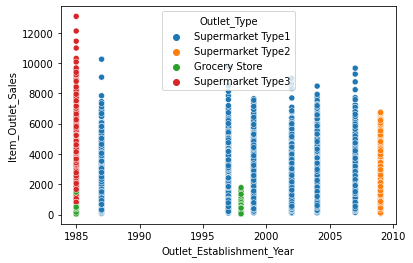

In [48]:
sns.scatterplot(df['Outlet_Establishment_Year'], df["Item_Outlet_Sales"], hue = df["Outlet_Type"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

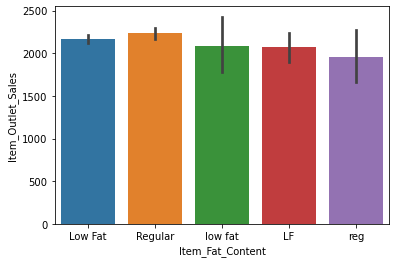

In [49]:
sns.barplot(df["Item_Fat_Content"], df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

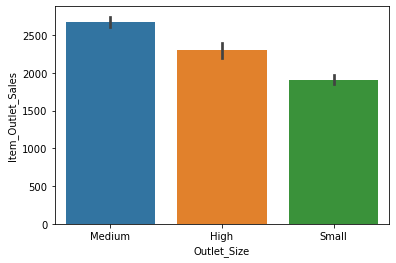

In [50]:
sns.barplot(df["Outlet_Size"], df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

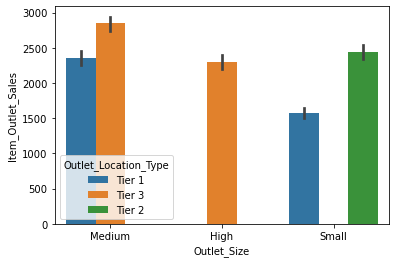

In [51]:
sns.barplot(df["Outlet_Size"], df["Item_Outlet_Sales"], hue = df["Outlet_Location_Type"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

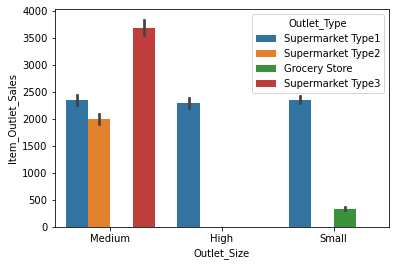

In [52]:
sns.barplot(df["Outlet_Size"], df["Item_Outlet_Sales"], hue = df["Outlet_Type"])

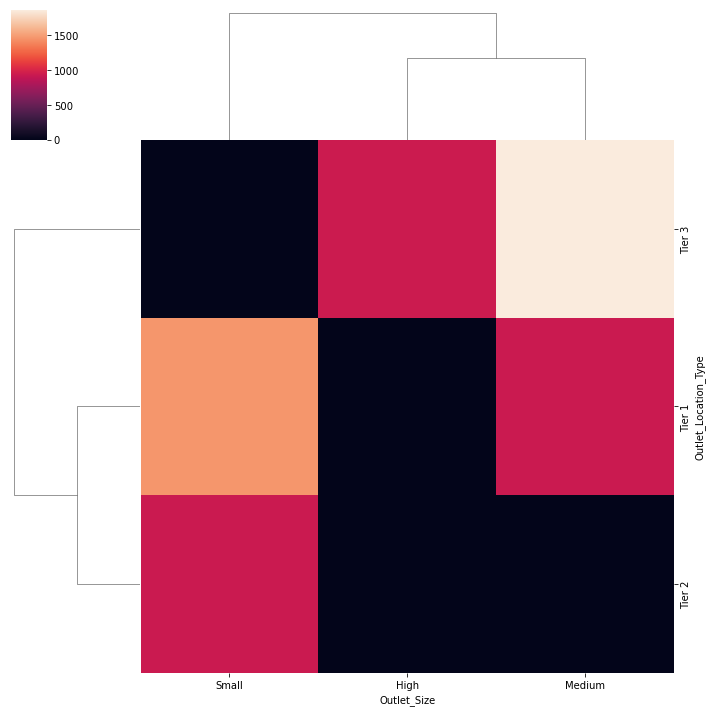

In [53]:
sns.clustermap(pd.crosstab(df['Outlet_Location_Type'],df["Outlet_Size"]))

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

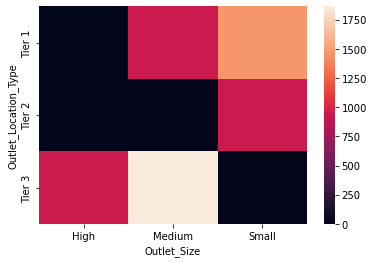

In [54]:
sns.heatmap(pd.crosstab(df['Outlet_Location_Type'],df["Outlet_Size"]))

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

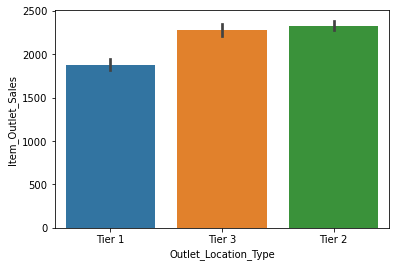

In [55]:
sns.barplot(df["Outlet_Location_Type"], df["Item_Outlet_Sales"])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

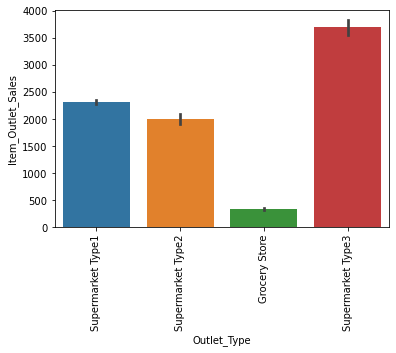

In [56]:
ax = sns.barplot(df["Outlet_Type"], df["Item_Outlet_Sales"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

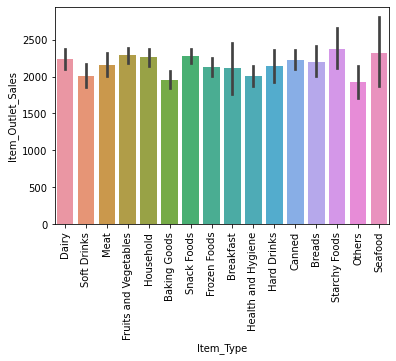

In [57]:
ax = sns.barplot(df["Item_Type"], df["Item_Outlet_Sales"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### <div class="alert alert-success">Observations </div>

* Most of the products are low fat
* No of sold items w.r.t Item Type  are Fruits and Vegetables then Snack Food then Household.         
* Most of the oulets are Medium and Small Sized.
* Most of the the outlet location type are Tier 3 then Tier 2 then Tier 1.
* Most of the outlets are Super market type 1.
* Establishment of the outlets is pretty even with most in 1985 and a slump in 1998.
* Unexpectedly item visibility decreases Item's sale.
* Item sales increases with item_MRP.
* Medium sized outlets are the most profitable w.r.t item sales.
* Tier 2 and Tier 3 sized outlets are most profitable w.r.t item sales.
* Supermarket Type 3 is most profitable w.r.t item sales.
* Starchy Food, Sea Food, Fruits and Vegetables are the most profitable item types w.r.t item_sales


## <div class="alert alert-info">  Data preprocessing </div>

#### Outlier Treatment

In [58]:
# Outlier treatment using wonsorization

In [59]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

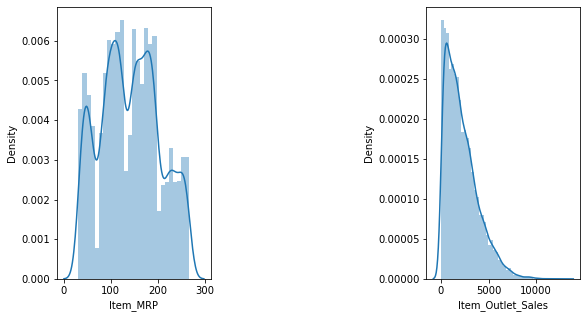

In [60]:
# Checking Distributons
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_Weight'])

plt.subplot(1,2,2)
sns.distplot(df['Item_Visibility'])

plt.subplot(1,5,3)
sns.distplot(df['Item_MRP'])

plt.subplot(1,5,5)
sns.distplot(df['Item_Outlet_Sales'])

plt.show()

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

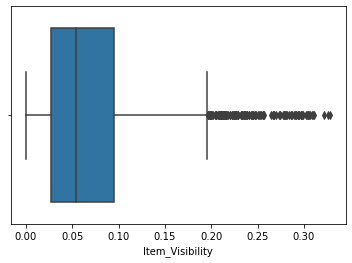

In [61]:
sns.boxplot(df['Item_Visibility'])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

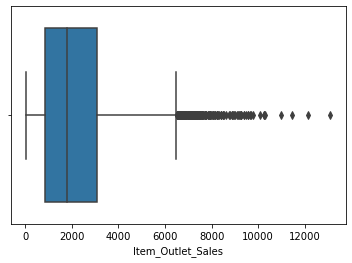

In [62]:
sns.boxplot(df['Item_Outlet_Sales'])

In [63]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [64]:
# Calculatinh upper percentile
upper_limit = df['Item_Visibility'].quantile(0.98)
upper_limit

0.18748802999999994

In [65]:
# Calculating lower percentile
lower_limit = df['Item_Visibility'].quantile(0.02)
lower_limit

0.0

In [66]:
df[(df['Item_Visibility'] >= upper_limit) | (df['Item_Visibility'] <= lower_limit)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8484,DRJ49,6.865,Low Fat,0.000000,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170


In [67]:
# Capping the outliers (Winsorizing)
import numpy as np
df['Item_Visibility'] = np.where(df['Item_Visibility'] >= upper_limit,
        upper_limit,
        np.where(df['Item_Visibility'] <= lower_limit,
        lower_limit,
        df['Item_Visibility']))

In [68]:
df.shape

(8523, 12)

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

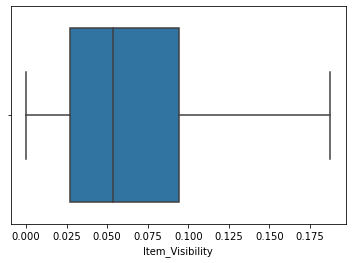

In [69]:
sns.boxplot(df['Item_Visibility'])

C:\Users\Hawk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

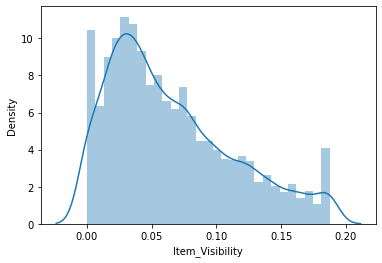

In [70]:
sns.distplot(df['Item_Visibility'])

In [71]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Taking Care of Missing Values

#### Item Weight

In [72]:
# As item_weight is related with item_type we have clacualted the mean of weight of different food categories and took the mean of it which is pretty close to mean of each of the category itself so using mean to impute missing vlaues

#### Training Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
from sklearn.preprocessing import OrdinalEncoder

In [75]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [76]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [77]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,FDM15,11.800,Regular,0.057422,Meat,149.9366,OUT046,1997,Small,Tier 1,Supermarket Type1
3315,FDU36,NaN,Low Fat,0.000000,Baking Goods,100.1384,OUT027,1985,Medium,Tier 3,Supermarket Type3
5932,FDX13,7.725,Low Fat,0.047783,Canned,249.1092,OUT046,1997,Small,Tier 1,Supermarket Type1
7872,FDH16,10.500,Low Fat,0.052555,Frozen Foods,89.6830,OUT046,1997,Small,Tier 1,Supermarket Type1
5946,FDU33,NaN,Regular,0.187488,Snack Foods,46.1402,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
1099,FDL33,7.235,Low Fat,0.099963,Snack Foods,193.8452,OUT046,1997,Small,Tier 1,Supermarket Type1
2514,FDN45,19.350,Low Fat,0.118103,Snack Foods,224.8088,OUT046,1997,Small,Tier 1,Supermarket Type1
6637,FDU03,18.700,Regular,0.092096,Meat,183.3292,OUT017,2007,NaN,Tier 2,Supermarket Type1
2575,DRG23,8.880,Low Fat,0.086957,Hard Drinks,152.5682,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [80]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,FDI44,NaN,Low Fat,0.099747,Fruits and Vegetables,75.2328,OUT027,1985,Medium,Tier 3,Supermarket Type3
1751,FDF41,12.15,Low Fat,0.131446,Frozen Foods,246.8460,OUT045,2002,NaN,Tier 2,Supermarket Type1
7648,FDY50,5.80,Low Fat,0.131221,Dairy,87.8172,OUT045,2002,NaN,Tier 2,Supermarket Type1
7362,NCN41,17.00,Low Fat,0.087388,Health and Hygiene,125.0730,OUT010,1998,NaN,Tier 3,Grocery Store
5332,FDS52,NaN,Low Fat,0.009585,Frozen Foods,102.5016,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
3503,FDL45,NaN,Low Fat,0.037505,Snack Foods,126.2704,OUT027,1985,Medium,Tier 3,Supermarket Type3
975,FDR20,20.00,Regular,0.028118,Fruits and Vegetables,46.7744,OUT035,2004,Small,Tier 2,Supermarket Type1
6190,NCC18,19.10,Low Fat,0.178273,Household,172.4422,OUT017,2007,NaN,Tier 2,Supermarket Type1
32,FDP33,18.70,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [81]:
# As item_weight is related with item_type we have clacualted the mean of weight of different food categories
X_train.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.265443
Breads                   11.209337
Breakfast                13.064359
Canned                   12.237224
Dairy                    13.364713
Frozen Foods             12.775856
Fruits and Vegetables    13.100614
Hard Drinks              11.362679
Health and Hygiene       13.046177
Household                13.295381
Meat                     13.060018
Others                   13.897168
Seafood                  13.035769
Snack Foods              12.996325
Soft Drinks              11.734803
Starchy Foods            13.906786
Name: Item_Weight, dtype: float64

In [82]:
X_train.groupby("Item_Type")["Item_Weight"].mean().mean()

12.772040729213641

In [83]:
# mean is pretty even across the item_type so filling nan values of item_ weight with mean
X_train["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [84]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1938
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Test Data

In [85]:
X_test["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [86]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  472
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

#### Outlet Size

In [87]:
# Outlet size is related to the type of the outlet so using Outlet Type to impute value so f Outlet Size

##### Training Data

In [88]:
X_train["Outlet_Size"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Medium    2203
Small     1928
High       749
Name: Outlet_Size, dtype: int64>

In [89]:
X_train.groupby(["Outlet_Type", "Outlet_Size"]).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           431
Supermarket Type1  High            749
                   Medium          739
                   Small          1497
Supermarket Type2  Medium          729
Supermarket Type3  Medium          735
dtype: int64

In [90]:
X_test.groupby(["Outlet_Type", "Outlet_Size"]).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           97
Supermarket Type1  High           183
                   Medium         191
                   Small          363
Supermarket Type2  Medium         199
Supermarket Type3  Medium         200
dtype: int64

In [91]:
X_train.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4236,FDI34,10.650000,Regular,0.085309,Snack Foods,230.2668,OUT045,2002,NaN,Tier 2,Supermarket Type1
1970,FDW39,12.857645,Regular,0.036732,Meat,177.2370,OUT027,1985,Medium,Tier 3,Supermarket Type3
5894,FDH31,12.857645,Regular,0.000000,Meat,98.2042,OUT019,1985,Small,Tier 1,Grocery Store
5462,NCA54,16.500000,Low Fat,0.036611,Household,180.9318,OUT013,1987,High,Tier 3,Supermarket Type1
3657,NCG30,20.200000,Low Fat,0.112228,Household,123.5046,OUT013,1987,High,Tier 3,Supermarket Type1
372,NCA54,16.500000,Low Fat,0.036716,Household,180.0318,OUT045,2002,NaN,Tier 2,Supermarket Type1
7664,FDT11,5.940000,Regular,0.029492,Breads,188.0556,OUT018,2009,Medium,Tier 3,Supermarket Type2
8335,FDO49,10.600000,Regular,0.033104,Breakfast,48.9008,OUT049,1999,Medium,Tier 1,Supermarket Type1
5704,FDM10,18.250000,Low Fat,0.075957,Snack Foods,214.1218,OUT035,2004,Small,Tier 2,Supermarket Type1
1705,FDY38,13.600000,Regular,0.119851,Dairy,234.5300,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [92]:
X_train.index

Int64Index([7173, 3315, 5932, 7872, 5946, 1104, 4507, 3612, 4370,  994,
            ...
            5167, 2773, 6751,  433, 4770, 1099, 2514, 6637, 2575, 7336],
           dtype='int64', length=6818)

In [93]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1938
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [94]:
# In each entry looking if it is a null value and to which Outlet type it belongs and then imputing accordingly

In [95]:
for index in X_train.index:
    if X_train["Outlet_Type"][index] == "Grocery Store":
        X_train["Outlet_Size"][index] = "Small"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\1042312908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Outlet_Size"][index] = "Small"


In [96]:
for index in X_train.index:
    if X_train["Outlet_Type"][index] == "Supermarket Type2":
        X_train["Outlet_Size"][index] = "Medium"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\3615014793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Outlet_Size"][index] = "Medium"


In [97]:
for index in X_train.index:
    if X_train["Outlet_Type"][index] == "Supermarket Type3":
        X_train["Outlet_Size"][index] = "Medium"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\3888971426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Outlet_Size"][index] = "Medium"


In [98]:
for index in X_train.index:
    if pd.isna(X_train["Outlet_Size"][index]) & (X_train["Outlet_Type"][index] == "Supermarket Type1"):
        X_train["Outlet_Size"][index] = "Small"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\1133869224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Outlet_Size"][index] = "Small"


In [99]:
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

##### Testing Data

In [100]:
for index in X_test.index:
    if X_test["Outlet_Type"][index] == "Supermarket Type2":
        X_test["Outlet_Size"][index] = "Medium"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\3135539098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Outlet_Size"][index] = "Medium"


In [101]:
for index in X_test.index:
    if X_test["Outlet_Type"][index] == "Supermarket Type3":
        X_test["Outlet_Size"][index] = "Medium"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\657751101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Outlet_Size"][index] = "Medium"


In [102]:
for index in X_test.index:
    if pd.isna(X_test["Outlet_Size"][index]) & (X_test["Outlet_Type"][index] == "Supermarket Type1"):
        X_test["Outlet_Size"][index] = "Small"

C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\3632403913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Outlet_Size"][index] = "Small"


In [103]:
for index in X_test.index:
    if X_test["Outlet_Type"][index] == "Grocery Store":
        X_test["Outlet_Size"][index] = "Small"


C:\Users\Hawk\AppData\Local\Temp\ipykernel_13032\1312691591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Outlet_Size"][index] = "Small"


In [104]:
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Encoding Categorical Variables

In [105]:
# Ordinal encoding Ordinal columns, Onehot encoding nominal columns

In [106]:
from sklearn.preprocessing import OrdinalEncoder

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 7173 to 7336
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 897.2+ KB


In [109]:
X_train["Item_Fat_Content"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Low Fat    4084
Regular    2300
LF          253
low fat      97
reg          84
Name: Item_Fat_Content, dtype: int64>

In [110]:
# Uniforming the item fat content
X_train["Item_Fat_Content"] = X_train["Item_Fat_Content"].map({"Low Fat" : "Low Fat", "LF" : "Low Fat", "low fat" : "Low Fat", "Regular" : "Regular", "reg" : "Regular"})

In [111]:
X_train["Item_Fat_Content"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Low Fat    4434
Regular    2384
Name: Item_Fat_Content, dtype: int64>

In [112]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,FDM15,11.800000,Regular,0.057422,Meat,149.9366,OUT046,1997,Small,Tier 1,Supermarket Type1
3315,FDU36,12.857645,Low Fat,0.000000,Baking Goods,100.1384,OUT027,1985,Medium,Tier 3,Supermarket Type3
5932,FDX13,7.725000,Low Fat,0.047783,Canned,249.1092,OUT046,1997,Small,Tier 1,Supermarket Type1
7872,FDH16,10.500000,Low Fat,0.052555,Frozen Foods,89.6830,OUT046,1997,Small,Tier 1,Supermarket Type1
5946,FDU33,12.857645,Regular,0.187488,Snack Foods,46.1402,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
1099,FDL33,7.235000,Low Fat,0.099963,Snack Foods,193.8452,OUT046,1997,Small,Tier 1,Supermarket Type1
2514,FDN45,19.350000,Low Fat,0.118103,Snack Foods,224.8088,OUT046,1997,Small,Tier 1,Supermarket Type1
6637,FDU03,18.700000,Regular,0.092096,Meat,183.3292,OUT017,2007,Small,Tier 2,Supermarket Type1
2575,DRG23,8.880000,Low Fat,0.086957,Hard Drinks,152.5682,OUT045,2002,Small,Tier 2,Supermarket Type1


In [113]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,FDI44,12.857645,Low Fat,0.099747,Fruits and Vegetables,75.2328,OUT027,1985,Medium,Tier 3,Supermarket Type3
1751,FDF41,12.150000,Low Fat,0.131446,Frozen Foods,246.8460,OUT045,2002,Small,Tier 2,Supermarket Type1
7648,FDY50,5.800000,Low Fat,0.131221,Dairy,87.8172,OUT045,2002,Small,Tier 2,Supermarket Type1
7362,NCN41,17.000000,Low Fat,0.087388,Health and Hygiene,125.0730,OUT010,1998,Small,Tier 3,Grocery Store
5332,FDS52,12.857645,Low Fat,0.009585,Frozen Foods,102.5016,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
3503,FDL45,12.857645,Low Fat,0.037505,Snack Foods,126.2704,OUT027,1985,Medium,Tier 3,Supermarket Type3
975,FDR20,20.000000,Regular,0.028118,Fruits and Vegetables,46.7744,OUT035,2004,Small,Tier 2,Supermarket Type1
6190,NCC18,19.100000,Low Fat,0.178273,Household,172.4422,OUT017,2007,Small,Tier 2,Supermarket Type1
32,FDP33,18.700000,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 7173 to 7336
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 897.2+ KB


In [115]:
# Seperating Ordinal, Nominal and Numerical data to process individually

In [116]:
ordinal_categories = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [117]:
nominal_categories = ["Item_Fat_Content", "Item_Type"]

In [118]:
numerical_columns = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]

In [119]:
X_train[ordinal_categories]

,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,Small,Tier 1,Supermarket Type1
3315,Medium,Tier 3,Supermarket Type3
5932,Small,Tier 1,Supermarket Type1
7872,Small,Tier 1,Supermarket Type1
5946,Small,Tier 1,Grocery Store
...,...,...,...
1099,Small,Tier 1,Supermarket Type1
2514,Small,Tier 1,Supermarket Type1
6637,Small,Tier 2,Supermarket Type1
2575,Small,Tier 2,Supermarket Type1


##### Training Data

In [120]:
oe = OrdinalEncoder()

In [121]:
oe.fit(X_train[ordinal_categories])

OrdinalEncoder()

In [122]:
X_train_oe = pd.DataFrame(oe.transform(X_train[ordinal_categories]), columns = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])

In [123]:
X_train_oe

,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,2.0,0.0,1.0
1,1.0,2.0,3.0
2,2.0,0.0,1.0
3,2.0,0.0,1.0
4,2.0,0.0,0.0
...,...,...,...
6813,2.0,0.0,1.0
6814,2.0,0.0,1.0
6815,2.0,1.0,1.0
6816,2.0,1.0,1.0


In [124]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [125]:
X_train[nominal_categories]

,Item_Fat_Content,Item_Type
7173,Regular,Meat
3315,Low Fat,Baking Goods
5932,Low Fat,Canned
7872,Low Fat,Frozen Foods
5946,Regular,Snack Foods
...,...,...
1099,Low Fat,Snack Foods
2514,Low Fat,Snack Foods
6637,Regular,Meat
2575,Low Fat,Hard Drinks


In [126]:
ohe.fit(X_train[nominal_categories])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [127]:
X_train_ohe = pd.DataFrame(ohe.transform(X_train[nominal_categories]))

In [128]:
X_train_ohe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
X_train_nc = X_train[numerical_columns]

In [130]:
X_train_nc

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
7173,11.800000,0.057422,149.9366,1997
3315,12.857645,0.000000,100.1384,1985
5932,7.725000,0.047783,249.1092,1997
7872,10.500000,0.052555,89.6830,1997
5946,12.857645,0.187488,46.1402,1985
...,...,...,...,...
1099,7.235000,0.099963,193.8452,1997
2514,19.350000,0.118103,224.8088,1997
6637,18.700000,0.092096,183.3292,2007
2575,8.880000,0.086957,152.5682,2002


In [131]:
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [132]:
X_train_ohe.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [133]:
X_train_nc.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [134]:
X_train_nc.reset_index(inplace = True)

In [135]:
X_train_nc

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7173,11.800000,0.057422,149.9366,1997
1,3315,12.857645,0.000000,100.1384,1985
2,5932,7.725000,0.047783,249.1092,1997
3,7872,10.500000,0.052555,89.6830,1997
4,5946,12.857645,0.187488,46.1402,1985
...,...,...,...,...,...
6813,1099,7.235000,0.099963,193.8452,1997
6814,2514,19.350000,0.118103,224.8088,1997
6815,6637,18.700000,0.092096,183.3292,2007
6816,2575,8.880000,0.086957,152.5682,2002


In [136]:
X_train_ohe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Combining all processed dataframes into one X_train_aap

In [138]:
X_train_aap = X_train_ohe
X_train_aap

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
X_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [140]:
X_train_aap["Item_Weight"] = X_train_nc["Item_Weight"]

In [141]:
X_train_aap["Item_Visibility"] = X_train_nc["Item_Visibility"]

In [142]:
X_train_aap["Item_MRP"] = X_train_nc["Item_MRP"]

In [143]:
X_train_aap["Outlet_Establishment_Year"] = X_train_nc["Outlet_Establishment_Year"]

In [144]:
X_train_aap

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997
6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997
6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007
6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002


In [145]:
X_train_ohe.reset_index(inplace = True)

In [146]:
X_train_ohe

,index,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997
6814,6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997
6815,6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007
6816,6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002


In [147]:
X_train_oe

,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,2.0,0.0,1.0
1,1.0,2.0,3.0
2,2.0,0.0,1.0
3,2.0,0.0,1.0
4,2.0,0.0,0.0
...,...,...,...
6813,2.0,0.0,1.0
6814,2.0,0.0,1.0
6815,2.0,1.0,1.0
6816,2.0,1.0,1.0


In [148]:
X_train_aap["Outlet_Location_Type"] = X_train_oe["Outlet_Location_Type"]

In [149]:
X_train_aap["Outlet_Size"] = X_train_oe["Outlet_Size"]

In [150]:
X_train_aap["Outlet_Type"] = X_train_oe["Outlet_Type"]

In [151]:
X_train_aap

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997,0.0,2.0,1.0
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985,2.0,1.0,3.0
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997,0.0,2.0,1.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997,0.0,2.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997,0.0,2.0,1.0
6814,6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997,0.0,2.0,1.0
6815,6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007,1.0,2.0,1.0
6816,6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002,1.0,2.0,1.0


In [152]:
X_train_aap.isnull().sum()

index                        0
0                            0
1                            0
2                            0
3                            0
4                            0
5                            0
6                            0
7                            0
8                            0
9                            0
10                           0
11                           0
12                           0
13                           0
14                           0
15                           0
16                           0
17                           0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

In [153]:
X_train_aap

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997,0.0,2.0,1.0
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985,2.0,1.0,3.0
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997,0.0,2.0,1.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997,0.0,2.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997,0.0,2.0,1.0
6814,6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997,0.0,2.0,1.0
6815,6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007,1.0,2.0,1.0
6816,6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002,1.0,2.0,1.0


In [154]:
X_train_aap

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997,0.0,2.0,1.0
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985,2.0,1.0,3.0
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997,0.0,2.0,1.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997,0.0,2.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997,0.0,2.0,1.0
6814,6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997,0.0,2.0,1.0
6815,6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007,1.0,2.0,1.0
6816,6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002,1.0,2.0,1.0


In [155]:
X_train_aap.drop(columns = "index", axis = 1, inplace = True)

##### Test

In [156]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,FDI44,12.857645,Low Fat,0.099747,Fruits and Vegetables,75.2328,OUT027,1985,Medium,Tier 3,Supermarket Type3
1751,FDF41,12.150000,Low Fat,0.131446,Frozen Foods,246.8460,OUT045,2002,Small,Tier 2,Supermarket Type1
7648,FDY50,5.800000,Low Fat,0.131221,Dairy,87.8172,OUT045,2002,Small,Tier 2,Supermarket Type1
7362,NCN41,17.000000,Low Fat,0.087388,Health and Hygiene,125.0730,OUT010,1998,Small,Tier 3,Grocery Store
5332,FDS52,12.857645,Low Fat,0.009585,Frozen Foods,102.5016,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
3503,FDL45,12.857645,Low Fat,0.037505,Snack Foods,126.2704,OUT027,1985,Medium,Tier 3,Supermarket Type3
975,FDR20,20.000000,Regular,0.028118,Fruits and Vegetables,46.7744,OUT035,2004,Small,Tier 2,Supermarket Type1
6190,NCC18,19.100000,Low Fat,0.178273,Household,172.4422,OUT017,2007,Small,Tier 2,Supermarket Type1
32,FDP33,18.700000,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [157]:
X_test_oe = pd.DataFrame(oe.transform(X_test[ordinal_categories]), columns = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])

In [158]:
X_test_oe

,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,2.0,3.0
1,2.0,1.0,1.0
2,2.0,1.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,0.0
...,...,...,...
1700,1.0,2.0,3.0
1701,2.0,1.0,1.0
1702,2.0,1.0,1.0
1703,1.0,2.0,2.0


In [159]:
X_test_ohe = pd.DataFrame(ohe.transform(X_test[nominal_categories]))

In [160]:
X_test_ohe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [161]:
X_test_nc = X_test[numerical_columns]

In [162]:
X_test_nc.reset_index( inplace = True)

In [163]:
X_test_nc

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1112,12.857645,0.099747,75.2328,1985
1,1751,12.150000,0.131446,246.8460,2002
2,7648,5.800000,0.131221,87.8172,2002
3,7362,17.000000,0.087388,125.0730,1998
4,5332,12.857645,0.009585,102.5016,1985
...,...,...,...,...,...
1700,3503,12.857645,0.037505,126.2704,1985
1701,975,20.000000,0.028118,46.7744,2004
1702,6190,19.100000,0.178273,172.4422,2007
1703,32,18.700000,0.000000,256.6672,2009


In [164]:
# Combining all processed dataframes into one X_test_aap

In [165]:
X_test_aap = X_test_ohe

In [166]:
X_test_aap

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [167]:

X_test_aap["Item_Weight"] = X_test_nc["Item_Weight"]
X_test_aap["Item_Visibility"] = X_test_nc["Item_Visibility"]
X_test_aap["Item_MRP"] = X_test_nc["Item_MRP"]
X_test_aap["Outlet_Establishment_Year"] = X_test_nc["Outlet_Establishment_Year"]
X_test_aap["Outlet_Location_Type"] = X_test_oe["Outlet_Location_Type"]
X_test_aap["Outlet_Size"] = X_test_oe["Outlet_Size"]
X_test_aap["Outlet_Type"] = X_test_oe["Outlet_Type"]

In [168]:
X_test_aap

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,12.857645,0.099747,75.2328,1985,2.0,1.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,12.150000,0.131446,246.8460,2002,1.0,2.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.800000,0.131221,87.8172,2002,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.000000,0.087388,125.0730,1998,2.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.009585,102.5016,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.037505,126.2704,1985,2.0,1.0,3.0
1701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,20.000000,0.028118,46.7744,2004,1.0,2.0,1.0
1702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.100000,0.178273,172.4422,2007,1.0,2.0,1.0
1703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,18.700000,0.000000,256.6672,2009,2.0,1.0,2.0


In [169]:
X_train_aap

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.800000,0.057422,149.9366,1997,0.0,2.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.000000,100.1384,1985,2.0,1.0,3.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.725000,0.047783,249.1092,1997,0.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,10.500000,0.052555,89.6830,1997,0.0,2.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.187488,46.1402,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.235000,0.099963,193.8452,1997,0.0,2.0,1.0
6814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,19.350000,0.118103,224.8088,1997,0.0,2.0,1.0
6815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.700000,0.092096,183.3292,2007,1.0,2.0,1.0
6816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,8.880000,0.086957,152.5682,2002,1.0,2.0,1.0


In [170]:
X_test_aap

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,12.857645,0.099747,75.2328,1985,2.0,1.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,12.150000,0.131446,246.8460,2002,1.0,2.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.800000,0.131221,87.8172,2002,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,17.000000,0.087388,125.0730,1998,2.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,12.857645,0.009585,102.5016,1985,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.857645,0.037505,126.2704,1985,2.0,1.0,3.0
1701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,20.000000,0.028118,46.7744,2004,1.0,2.0,1.0
1702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.100000,0.178273,172.4422,2007,1.0,2.0,1.0
1703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,18.700000,0.000000,256.6672,2009,2.0,1.0,2.0


## <div class="alert alert-info">  Modelling  </div>

In [171]:
# Using XGBRegressor, GBRegressor and Rnadom Forest for estimation

In [172]:
from xgboost import XGBRegressor

In [173]:
from sklearn.ensemble import GradientBoostingRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
# XGBRegressor

In [176]:
regressor = XGBRegressor()

In [177]:
regressor.fit(X_train_aap, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [178]:
X_test_aap.isnull().sum()

0                            0
1                            0
2                            0
3                            0
4                            0
5                            0
6                            0
7                            0
8                            0
9                            0
10                           0
11                           0
12                           0
13                           0
14                           0
15                           0
16                           0
17                           0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

In [179]:
y_preds = regressor.predict(X_test_aap)

In [180]:
# GBRegressor

In [218]:
gbregressor = GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1, subsample=0.75)

In [219]:
gbregressor.fit(X_train_aap, y_train)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1, subsample=0.75)

In [220]:
gbregressor.score(X_test_aap, y_test)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5863771987828998

In [223]:
gbpredict = gbregressor.predict(X_test_aap)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [185]:
# RandomForest

In [186]:
rfregressor = RandomForestRegressor(n_estimators = 100)

In [187]:
rfregressor.fit(X_train_aap, y_train)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor()

In [188]:
rfregressor.score(X_test_aap, y_test)

C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5465587287223319

## <div class="alert alert-info">Evaluation  </div>

In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [190]:
# XGBRegressor

In [191]:
print('R2 score: ',r2_score(y_test,y_preds))

R2 score:  0.5318570074794755


In [192]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_preds, squared = False))

Mean Squared Error:  1202.1615503298676


In [193]:
# define variables for adjusted r2 score
r2 = r2_score(y_test, y_preds)
n = len(y_test)
k = len(X_test_aap.columns)

# calculate adjusted r2 score
adj_r2_score = 1-(((1-r2)*(n-1))/(n-k-1))

print("Adjusted r2 score: ", adj_r2_score)

Adjusted r2 score:  0.5248864447558227


In [194]:
# GBRegressor

In [224]:
print('R2 score: ',r2_score(y_test,gbpredict))

R2 score:  0.5863771987828998


In [225]:
print("Mean Squared Error: ", mean_squared_error(y_test, gbpredict, squared = False))

Mean Squared Error:  1129.993136841546


In [226]:
# define variables for adjusted r2 score
r2 = r2_score(y_test, gbpredict)
n = len(y_test)
k = len(X_test_aap.columns)

# calculate adjusted r2 score
adj_r2_score = 1-(((1-r2)*(n-1))/(n-k-1))

print("Adjusted r2 score: ", adj_r2_score)

Adjusted r2 score:  0.5802184316414898


#### Best Score:

Best Score by GBRegressor(After Hyperparameter Tuning): 58.6 % 

## <div class="alert alert-info"> Hyperparameter Tuning  </div>

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [199]:
params={
    'model__n_estimators': [100, 400, 800],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.05, 0.1, 0.20],
    }

In [200]:
random_search=RandomizedSearchCV(regressor, param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)

In [201]:
random_search.fit(X_train_aap,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:25:03] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.05, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 6, 9],
                                        'model__n_estimators': [100, 400, 800]},
                   scoring='r2', verbose=3)

In [202]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, model__learning_rate=0.1, model__max_depth=3,
             model__n_estimators=400, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [203]:
random_search.best_params_

{'model__n_estimators': 400,
 'model__max_depth': 3,
 'model__learning_rate': 0.1}

In [211]:
# Hyperparameter Tuning GBRegressor
gbparams={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}

In [212]:
gbrandom_search = RandomizedSearchCV(estimator=gbregressor,param_distributions=gbparams,scoring='r2',n_jobs=-1,cv=5, verbose = 3)

In [215]:
gbrandom_search.fit(X_train_aap,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hawk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=500),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [500, 1000, 2000],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]},
                   scoring='r2', verbose=3)

In [216]:
gbrandom_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1, subsample=0.75)

## <div class="alert alert-info"> Saving the Model </div>

In [204]:
import pickle
pickle.dump(gbregressor,open('gbregressor.pkl','wb'))

## <div class="alert alert-success"> Summary </div>

### Key Observations:

* Most of the products are low fat
* No of sold items w.r.t Item Type  are Fruits and Vegetables then Snack Food then Household.         
* Most of the oulets are Medium and Small Sized.
* Most of the the outlet location type are Tier 3 then Tier 2 then Tier 1.
* Most of the outlets are Super market type 1.
* Establishment of the outlets is pretty even with most in 1985 and a slump in 1998.
* Unexpectedly item visibility decreases Item's sale.
* Item sales increases with item_MRP.
* Medium sized outlets are the most profitable w.r.t item sales.
* Tier 2 and Tier 3 sized outlets are most profitable w.r.t item sales.
* Supermarket Type 3 is most profitable w.r.t item sales.
* Starchy Food, Sea Food, Fruits and Vegetables are the most profitable item types w.r.t item_sales


### Model Improvement:

* Adding more revalent features:
    * Customer reviews on a particular product
    * Customer reviews on a particular Outlet
    * Ease of access to the product and Outlet etc
* Adding more data 